## 결정 트리(DecisionTree)
- 직관적이고 쉬운 모델 방식  
- 스무고개 퀴즈 
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 단독으로 사용되는 경우보다 여러개의 DT가 모여서 사용됨 ==> 앙상블

In [2]:
# 모듈 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import all_estimators
# plot_tree는 트리 시각화 함수
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## [1] 데이터 로딩

In [3]:
# 데이터 프레임 형태로 데이터 로딩
dataX,datay=load_breast_cancer(return_X_y=True,as_frame=True)

# Bunch 타입 => key로 data, target, targt_names, feature_names...
# dataX,datay=load_breast_cancer()

In [4]:
# 정보확인
print(f"dataX의 정보\n{dataX.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# 열이름
print(f"dataX의 열이름\n{dataX.columns}")
f_names=dataX.columns

dataX의 열이름
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [6]:
# 각열 결측치
print(f"dataX의 결측치 확인\n{dataX.isnull().sum()}")

dataX의 결측치 확인
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [7]:
# 데이터 프레임을 배열로 바꾸기
print(f"dataX 타입이 {type(dataX.values)}")
print(f"datay 타입이 {type(datay.values)}")
print(f"dataX 타입이 {type(dataX.to_numpy())}")
print(f"datay 타입이 {type(datay.to_numpy())}")

dataX 타입이 <class 'numpy.ndarray'>
datay 타입이 <class 'numpy.ndarray'>
dataX 타입이 <class 'numpy.ndarray'>
datay 타입이 <class 'numpy.ndarray'>


## [2]학습 & 테스트 데이터 분리

In [8]:
# train:test=75:25
# stratify=라벨 즉, 타겟 데이터 지정 : 학습 & 테스트 데이터에도 비율 맞추기
train_X,test_X,train_y,test_y=train_test_split(dataX,datay,stratify=datay,random_state=42)

In [9]:
print(f"train_X의 모양은 {train_X.shape}, test_X의 모양은 {test_X.shape}")

train_X의 모양은 (426, 30), test_X의 모양은 (143, 30)


## [3] 훈련


In [10]:
# 모델 객체 생성
dtmodel=DecisionTreeClassifier()

In [11]:
# 학습용 데이터 학습 진행
dtmodel.fit(train_X,train_y)

DecisionTreeClassifier()

### 모델 속성 확인
- DT에서 속성들 중에서 속성도 중요도를 감지 가능
- Feature별로 특성들의 중요도 값
- 모든 값 합치면 1

In [12]:
print(f"{dtmodel.feature_importances_}")
print(f"{dtmodel.feature_importances_.max()}")
print(f"최대값의 인덱스는 {dtmodel.feature_importances_.argmax()}")
print(f"최대값의 특성값은 {dtmodel.feature_names_in_[dtmodel.feature_importances_.argmax()]}")
print(f"{dtmodel.feature_importances_.min()}")

[0.00944435 0.         0.         0.         0.         0.
 0.         0.03391769 0.0080277  0.         0.         0.
 0.00860111 0.01600893 0.00188491 0.         0.02150277 0.
 0.         0.01427147 0.         0.04671969 0.69546322 0.00493953
 0.         0.         0.00980366 0.12941498 0.         0.        ]
0.6954632181471273
최대값의 인덱스는 22
최대값의 특성값은 worst perimeter
0.0


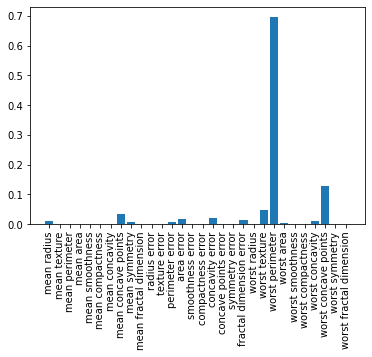

In [13]:
# 수직 그래프
plt.bar(dtmodel.feature_names_in_,np.array(dtmodel.feature_importances_))
plt.xticks(rotation=90)
plt.show()

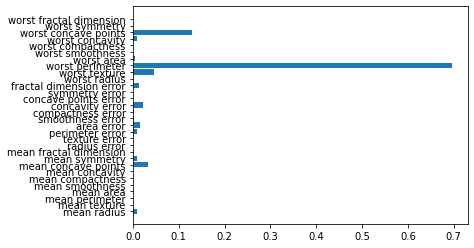

In [14]:
# 수평 그래프
plt.barh(y=dtmodel.feature_names_in_,width=np.array(dtmodel.feature_importances_))
plt.show()

## [4] 평가

In [15]:
# 평가
trian_score=dtmodel.score(train_X,train_y)
test_score=dtmodel.score(test_X,test_y)

print(f"train_score : {trian_score} - test_score : {test_score}")

train_score : 1.0 - test_score : 0.9300699300699301


## DT 시각화

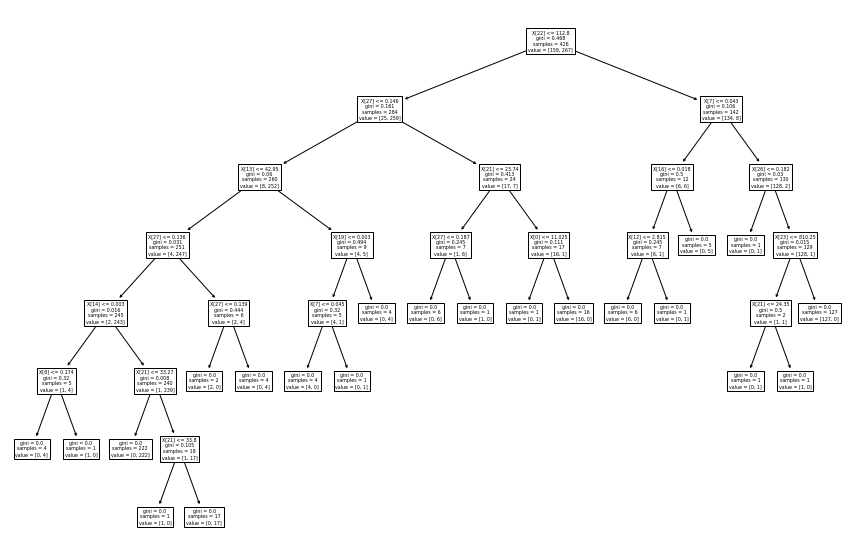

In [16]:
plt.figure(figsize=(15,10))
plot_tree(dtmodel)
plt.savefig('tree.png') # 파일 저장
plt.show()

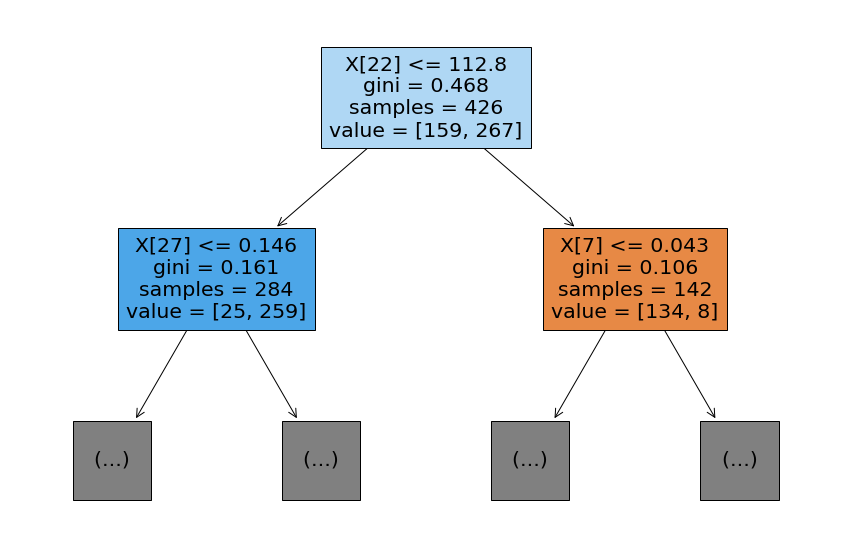

In [17]:
plt.figure(figsize=(15,10))
plot_tree(dtmodel,max_depth=1,filled=True)
plt.show()

# filled=옵션으로 색깔주기
# max_depth=옵션으로 깊이 제한주기

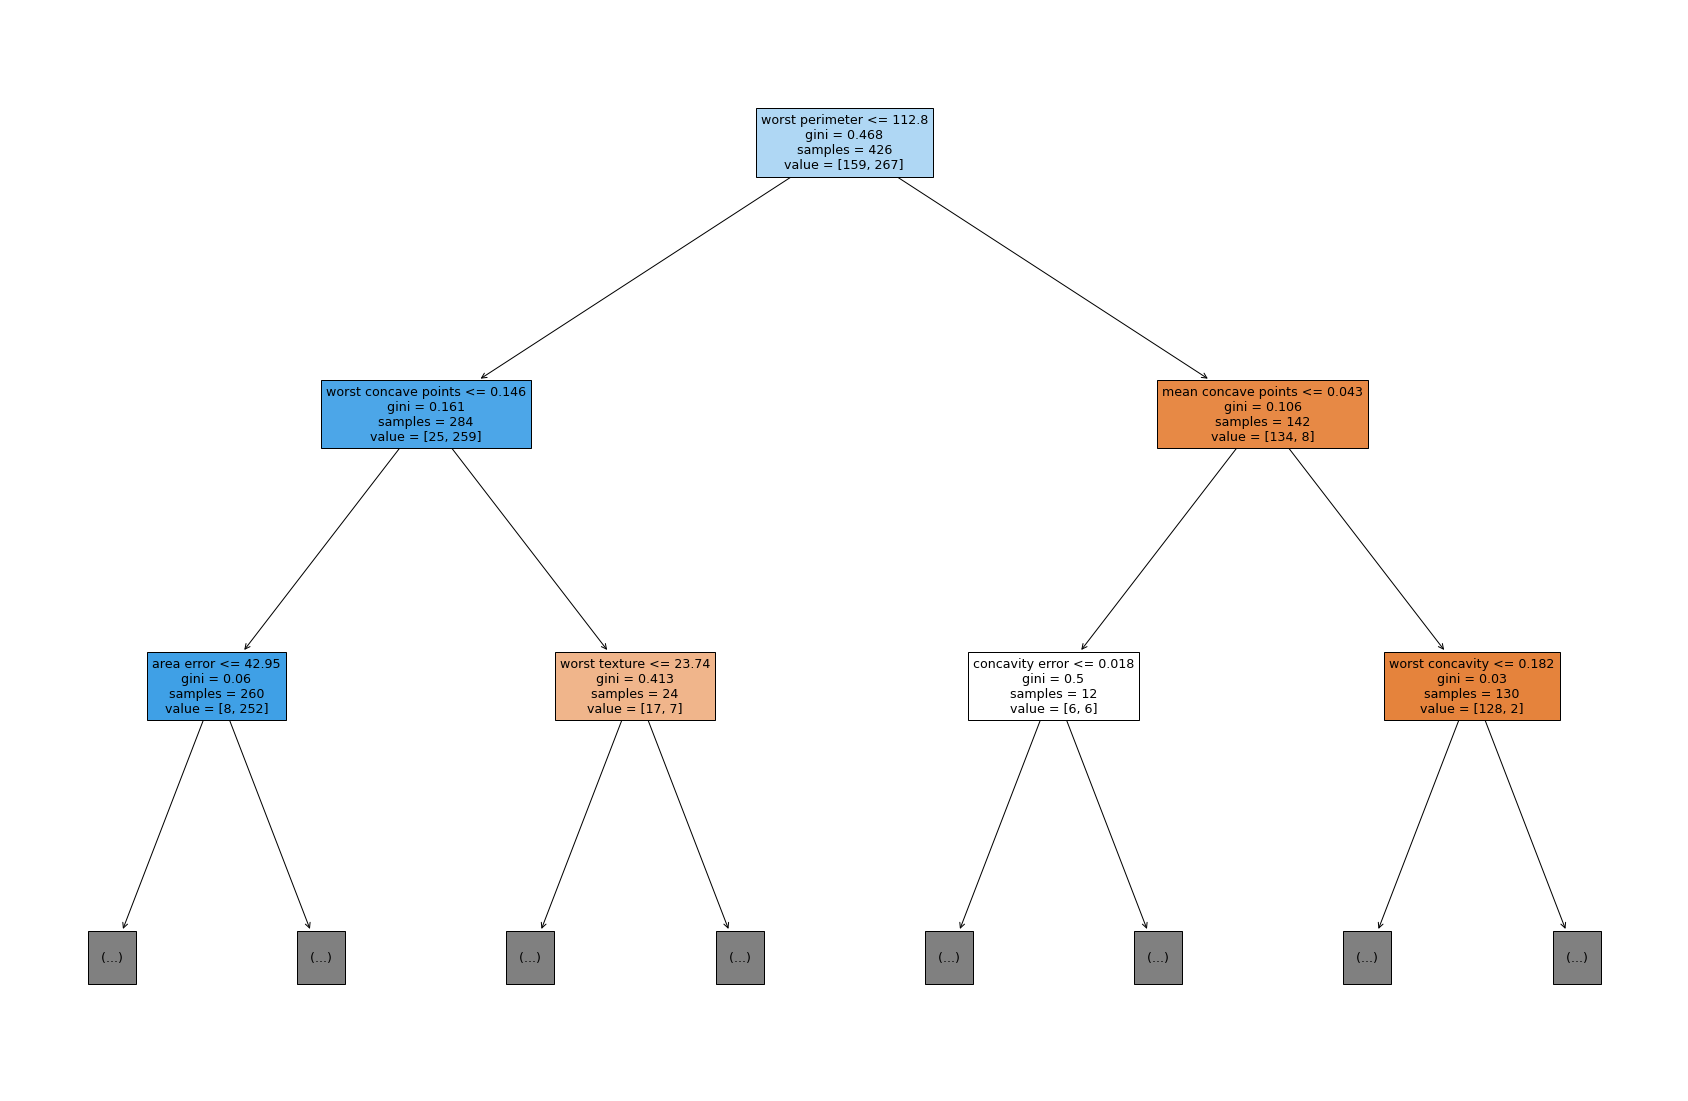

In [18]:
plt.figure(figsize=(30,20))
plot_tree(dtmodel,max_depth=2,filled=True,feature_names=f_names)
plt.show()

### RandomForest 학습 모델
- 100개 dEcisionTree 모델
- 중복허용된 랜덤 샘플 + DecisionTree 모델

In [19]:
# 모델 객체생성 및 훈련
rfmodel=RandomForestClassifier().fit(train_X,train_y)
print(f"train 평가 점수: {rfmodel.score(train_X,train_y)}")
print(f"test 평가 점수: {rfmodel.score(test_X,test_y)}")

train 평가 점수: 1.0
test 평가 점수: 0.958041958041958


In [20]:
# 모델 학습후 속성 확인
print(f"랜덤 포레스트 classes_ : {rfmodel.classes_}")
print(f"랜덤 포레스트 base_estimator : {rfmodel.base_estimator}")

랜덤 포레스트 classes_ : [0 1]
랜덤 포레스트 base_estimator : DecisionTreeClassifier()


In [21]:
# 베스트 모델로 평가
bestmode=rfmodel.base_estimator_
print(bestmode) # 객체
print(f"train 평가 점수: {rfmodel.score(train_X,train_y)}")
print(f"test 평가 점수: {rfmodel.score(test_X,test_y)}")

DecisionTreeClassifier()
train 평가 점수: 1.0
test 평가 점수: 0.958041958041958


### 랜덤포레스트 열 매개변수 사용해보기

In [22]:
# oob_score: 중복허용랜덤샘플에 포함되지 않은 데이터 => 
rfmodel=RandomForestClassifier(oob_score=True).fit(train_X,train_y)
print(f"랜덤 포레스트 classes_ : {rfmodel.classes_}")
print(f"랜덤 포레스트 base_estimator : {rfmodel.base_estimator}")
print(f"랜덤 포레스트 estimators_ : {rfmodel.estimators_}")
print(f"랜덤 포레스트 oob_score_ : {rfmodel.oob_score_}")
print(f"test 특성 중요도: {rfmodel.feature_importances_}")
print(f"test n_features_in_: {rfmodel.n_features_in_}")

랜덤 포레스트 classes_ : [0 1]
랜덤 포레스트 base_estimator : DecisionTreeClassifier()
랜덤 포레스트 estimators_ : [DecisionTreeClassifier(max_features='sqrt', random_state=147320401), DecisionTreeClassifier(max_features='sqrt', random_state=385555340), DecisionTreeClassifier(max_features='sqrt', random_state=298750212), DecisionTreeClassifier(max_features='sqrt', random_state=1400523534), DecisionTreeClassifier(max_features='sqrt', random_state=1701780448), DecisionTreeClassifier(max_features='sqrt', random_state=581593866), DecisionTreeClassifier(max_features='sqrt', random_state=1601485295), DecisionTreeClassifier(max_features='sqrt', random_state=871243742), DecisionTreeClassifier(max_features='sqrt', random_state=334321421), DecisionTreeClassifier(max_features='sqrt', random_state=908818607), DecisionTreeClassifier(max_features='sqrt', random_state=135461787), DecisionTreeClassifier(max_features='sqrt', random_state=760871502), DecisionTreeClassifier(max_features='sqrt', random_state=1414705434), D

In [23]:
# 모델평가
bestmode=rfmodel.base_estimator_
print(bestmode) # 객체
print(f"train 평가 점수: {rfmodel.score(train_X,train_y)}")
print(f"test 평가 점수: {rfmodel.score(test_X,test_y)}")

DecisionTreeClassifier()
train 평가 점수: 1.0
test 평가 점수: 0.958041958041958


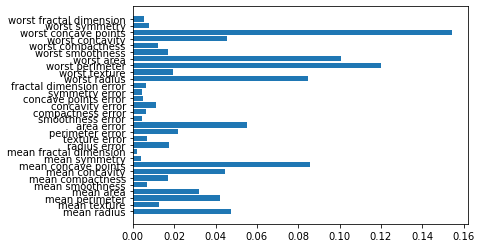

In [24]:
# 수평 그래프
plt.barh(y=f_names,width=rfmodel.feature_importances_) # x가 없어도 됨
plt.show()